# Load Preprocessed Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('combined_data.csv')       # read the data
df.head()

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,prize_9,prize_10,prize_11,prize_12,prize_13,prize_14,prize_15,prize_16,prize_17,prize_18
0,271018,67106,22,0,484,False,14854,4059,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,271018,280298,22,0,377,False,2658,16080,2,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,271018,164632,23,0,218,False,6074,16041,3,82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,271018,200213,24,0,377,False,13635,6371,4,117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,271018,347084,24,0,277,False,16945,15076,5,255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe(include='all'))  # Summary statistics

Descriptive Statistics:
                 rid     horseName           age        saddle  decimalPrice  \
count   4.107315e+06  4.107315e+06  4.107315e+06  4.107315e+06  4.107315e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    2.079191e+05  1.854544e+05  2.091367e+01  5.645799e+00  3.545468e+02   
std     1.199290e+05  1.072815e+05  2.246036e+00  4.855503e+00  1.149143e+02   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     1.036025e+05  9.196600e+04  1.900000e+01  1.000000e+00  2.270000e+02   
50%     2.086340e+05  1.852320e+05  2.000000e+01  5.000000e+00  3.570000e+02   
75%     3.117560e+05  2.781690e+05  2.200000e+01  9.000000e+00  4.430000e+02   
max     4.150900e+05  3.718680e+05  3.700000e+01  4.000000e+01  6.420000e+02   

          isFav

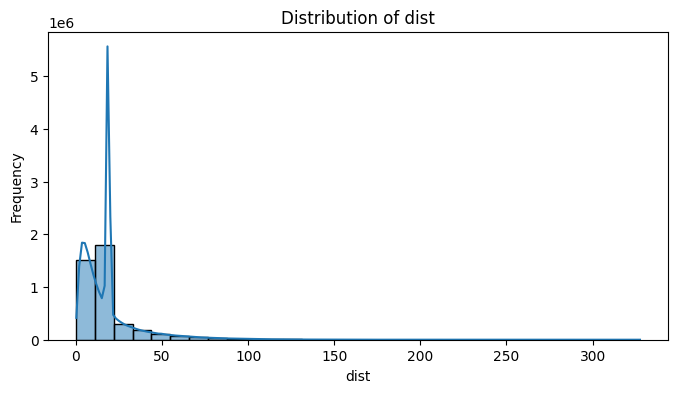

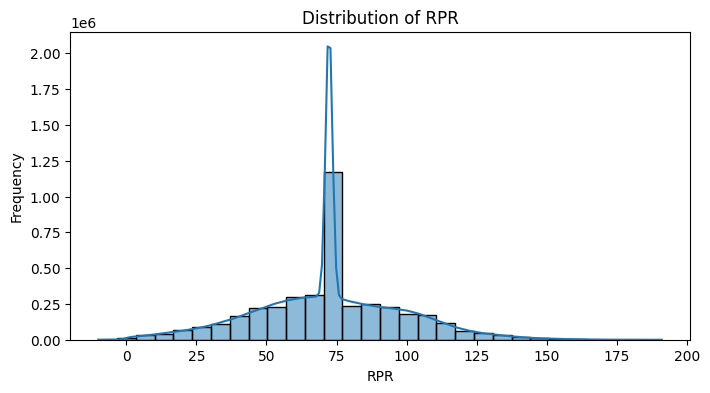

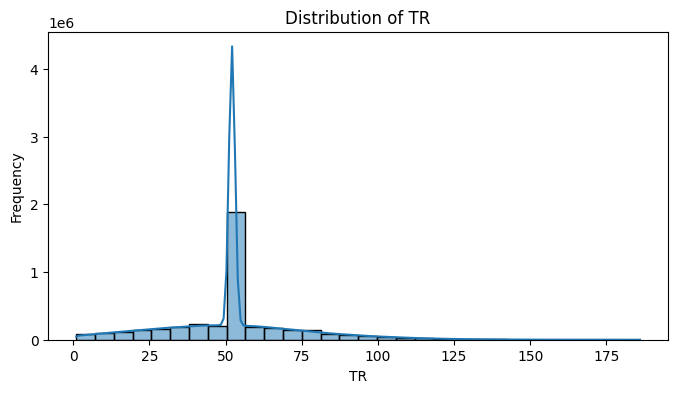

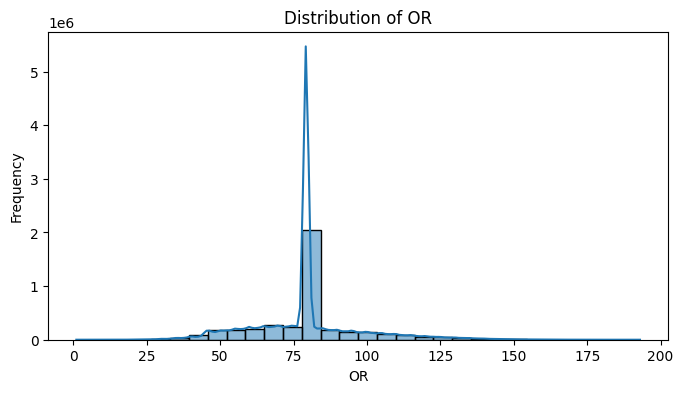

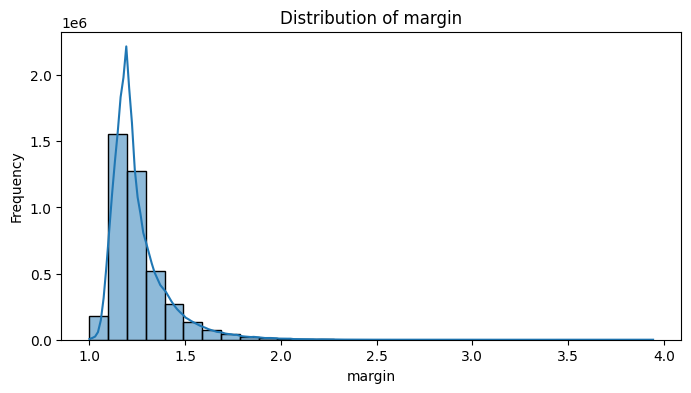

KeyboardInterrupt: 

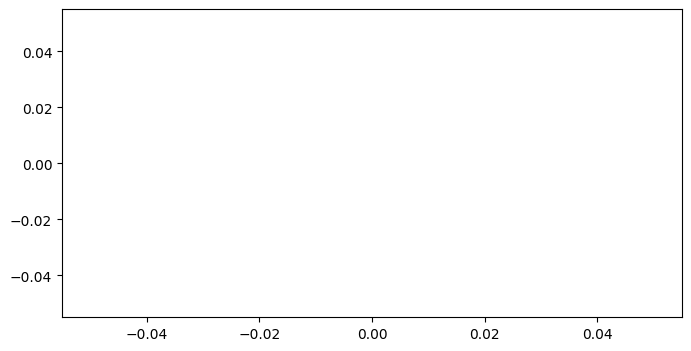

In [12]:
# Distribution plots for continuous variables
continuous_features = df.select_dtypes(include=['float64']).columns
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [10]:
# Correlation Analysis
print("Correlation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

Correlation Matrix:


ValueError: could not convert string to float: '1990-01-01'

In [ ]:
# Heatmap for correlation visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Mutual Information Analysis (for regression or classification tasks)
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

# Specify the target variable
target = 'your_target_column'
X = df.drop(columns=[target])
y = df[target]

if df[target].dtype in ['float64', 'int64']:
    mutual_info = mutual_info_regression(X.select_dtypes(include=['float64', 'int64']), y)
else:
    mutual_info = mutual_info_classif(X, y)

mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series = mutual_info_series.sort_values(ascending=False)
print("Mutual Information:")
print(mutual_info_series)

# Visualization
# Scatter plots for selected pairs of features
selected_features = continuous_features[:3]  # Adjust as needed
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f'Scatter Plot: {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

# Box plots for categorical variables
categorical_features = df.select_dtypes(include=['object', 'category']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature], y=df[target])
    plt.title(f'Box Plot: {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.xticks(rotation=45)
    plt.show()


# Visualization

In [7]:
target1 = df['res_win']
target2 = df['res_place']

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Calculate Cramér's V for a confusion matrix
def cramers_v(matrix):
    if matrix.size == 0:
        return np.nan
    chi2, _, _, _ = chi2_contingency(matrix)
    n = matrix.sum().sum()
    return np.sqrt(chi2 / n / min(matrix.shape[0] - 1, matrix.shape[1] - 1))

# Generate and visualize Cramér's V matrix
def plot_cramers_v_heatmap(df, target, title="Cramér's V Heatmap"):
    cat_cols = df.select_dtypes(include=['int64']).columns
    cramers_v_vals = {
        col: cramers_v(pd.crosstab(df[col], df[target])) for col in cat_cols if col != target
    }
    cramers_v_df = pd.DataFrame.from_dict(cramers_v_vals, orient='index', columns=[target])

    plt.figure(figsize=(8, len(cramers_v_df) * 0.5))
    sns.heatmap(cramers_v_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.ylabel("Features")
    plt.xlabel("Target")
    plt.show()

# Usage
plot_cramers_v_heatmap(df, target1)        # plot the heatmap for res_win

In [ ]:
plot_cramers_v_heatmap(df, target2)      # plot the heatmap for res_place

Bar Plots for Categorical Feature Distributions by Target

In [ ]:
cat_cols = df.select_dtypes(include=['int64']).columns
cat_cols

In [ ]:
def plot_categorical_distributions(df, target):
    # categorical_columns = df.select_dtypes(include=['number']).columns  # Adjusted for encoded columns
    for col in cat_cols:
        if col != target:       # Skip the target column
            plt.figure(figsize=(8, 5))
            sns.countplot(x=col, hue=target, data=df, palette="Set2")
            plt.title(f"Distribution of {col} by {target}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# Example usage
plot_categorical_distributions(df, target1)
plot_categorical_distributions(df, target2)

Box Plots for Numerical Features

In [31]:
def plot_numerical_boxplots(df, target):
    # numerical_columns = df.select_dtypes(include=['number']).columns
    for col in cat_cols:
        if col != target:
            plt.figure(figsize=(8, 5))
            sns.boxplot(x=target, y=col, data=df, palette="coolwarm")
            plt.title(f"{col} distribution by {target}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# Example usage
plot_numerical_boxplots(df, target1)
plot_numerical_boxplots(df, target2)

Pairplot for Relationship Exploration

In [ ]:
def plot_pairplot(df, target_column_name):
    if target_column_name not in df.columns:
        raise ValueError(f"Target column {target_column_name} not found in DataFrame.")
    if df[target_column_name].nunique() <= 1:
        raise ValueError(f"Target column {target_column_name} must have more than one unique value.")
    
    sns.pairplot(df, hue=target_column_name, palette="viridis")
    plt.suptitle(f"Pairplot for {target_column_name}", y=1.02)
    plt.show()

# Example usage
plot_pairplot(df, 'res_win')
plot_pairplot(df, 'res_place')

In [ ]:
def plot_jointplot(df, feature, target):
    sns.jointplot(data=df, x=feature, y=target, kind="scatter", hue=target, palette="viridis")
    plt.suptitle(f"Jointplot of {feature} vs {target}", y=1.02)
    plt.show()

# Example usage
plot_jointplot(df, 'position', target1)
plot_jointplot(df, 'position', target2)

In [ ]:
def plot_correlation_heatmap(df, targets):
    plt.figure(figsize=(10, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Matrix with {targets}")
    plt.show()

# Example usage
plot_correlation_heatmap(df, [target1, target2])

In [24]:
def plot_categorical_distributions(df, target):
    for col in cat_cols:
        if col != target:
            plt.figure(figsize=(8, 5))
            sns.countplot(x=col, hue=target, data=df, palette="Set2")
            plt.title(f"Distribution of {col} by {target}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# Example usage
plot_categorical_distributions(df, target1)
# plot_categorical_distributions(df, target2)

In [ ]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age') 
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Count plot of res_win
plt.figure(figsize=(10, 6))
sns.countplot(x='res_win', data=df)
plt.title('Count of Winning Results')
plt.xlabel('Winning Result')
plt.ylabel('Count')
plt.show()

In [ ]:
# Count plot of res_win
plt.figure(figsize=(10, 6))
sns.countplot(x='res_place', data=df)
plt.title('Count of Winning Results')
plt.xlabel('Winning Result')
plt.ylabel('Count')
plt.show()